In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [2]:
#Loading the dataset
x_breast,y_breast=load_breast_cancer(return_X_y=True)
x=pd.DataFrame(x_breast)
y=pd.Series(y_breast).map({0:1,1:0})
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Percentage of the target columns
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
#Splitting the dataset into the train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# GridSearch

1.Lets use Grid Search to find the best hyperparameter for a gradient boosting classifier

In [6]:
#Set up the model
gbm=GradientBoostingClassifier(random_state=0)

#determine the hyperparameter space
param_grid=dict(
n_estimators=[10,20,50,100],
min_samples_split=[0.1,0.3,0.5],
max_depth=[1,2,3,4,None],)

print("Number of hyperparameter combinations:",len(param_grid['n_estimators'])*
     len(param_grid['min_samples_split'])*len(param_grid['max_depth']))

Number of hyperparameter combinations: 60


In [8]:
#Set up the search
search=GridSearchCV(gbm,param_grid=param_grid,scoring='roc_auc',cv=5,refit=True)
#Find the best hyperparameter
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, None],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [9]:
#The best hyperparameter are stored in the attribute
print(search.best_params_)

{'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 100}


In [10]:
#We also find the data for all models evaluated
results=pd.DataFrame(search.cv_results_)
print(results.shape)
results.head()

(60, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009805,7.542776e-04,0.001828,7.911531e-04,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58
1,0.017602,4.889281e-04,0.001402,4.907971e-04,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.978333,0.952000,0.968667,0.986897,0.970068,0.971193,0.011607,52
2,0.040008,1.507891e-07,0.002001,1.784161e-07,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.997000,0.963667,0.983333,0.993103,0.980272,0.983475,0.011647,33
3,0.078616,4.902518e-04,0.001602,4.900184e-04,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",1.000000,0.974333,0.988667,0.997241,0.983673,0.988783,0.009298,18
4,0.009201,3.998996e-04,0.001601,4.899405e-04,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.979000,0.953000,0.966000,0.983103,0.940136,0.964248,0.016026,58


In [11]:
#we can order the different models based on their performance
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results[['param_max_depth','param_min_samples_split','param_n_estimators','mean_test_score','std_test_score']].head()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,2,0.1,100,0.992415,0.006426
1,2,0.3,100,0.992013,0.006461
2,3,0.5,100,0.991949,0.006547
3,4,0.5,100,0.991620,0.007117
4,2,0.5,100,0.991545,0.006363


Text(0.5, 0, 'Hyperparameter space')

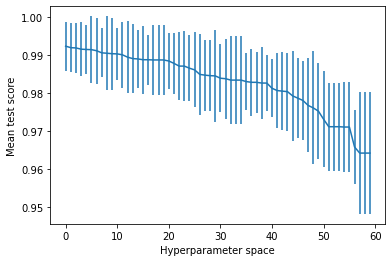

In [12]:
#Plot model performab=nce and the errors
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']],subplots=True)
plt.ylabel("Mean test score")
plt.xlabel('Hyperparameter space')

In [13]:
#Lets predict the probability
x_train_pred=search.predict_proba(x_train)[:,1]
x_test_pred=search.predict_proba(x_test)[:,1]
print("Train roc_auc:",roc_auc_score(y_train,x_train_pred))
print("Test roc_auc:",roc_auc_score(y_test,x_test_pred))

Train roc_auc: 1.0
Test roc_auc: 0.996766607877719


In [14]:
#Lets make the funbction to evaluate the model performance based on
# single hyperparameter
def summarize_by_param(hparam):
    tmp=pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ],axis=1)
    tmp.columns=['mean_test_score','std_test_score']
    return tmp

In [15]:
#Performance chane for the n_estimators
tmp=summarize_by_param('param_n_estimators')
tmp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.973359,0.006228
20,0.980845,0.005222
50,0.987409,0.002550
100,0.990123,0.002078


Text(0, 0.5, 'roc_auc')

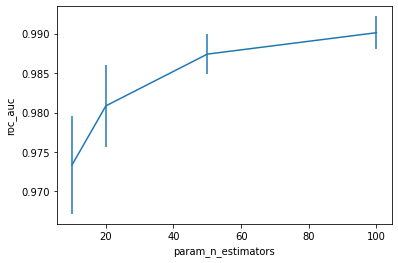

In [16]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc_auc')

Text(0, 0.5, 'roc_auc')

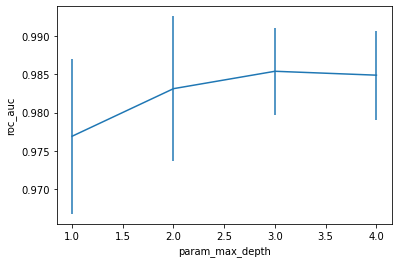

In [17]:
#The optimal hyperparameter seems to be some where between 60 and 100
tmp=summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc_auc')

Text(0, 0.5, 'roc_auc')

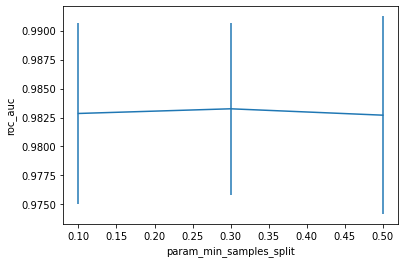

In [19]:
#The optimal hyperkparameter seems to be between 2 and 3
tmp=summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'],tmp['std_test_score']],subplots=True)
plt.ylabel('roc_auc')

The parameter doesnot seems to improve performance much

In [22]:
import warnings
warnings.filterwarnings('ignore')
#determine the hyperparameter space
param_grid=dict(
n_estimators=[60,80,100,120],
max_depth=[2,3],
loss=['deviance','exponential'],)
#set up the search
search=GridSearchCV(gbm,param_grid=param_grid,scoring='roc_auc',cv=5,refit=True)
#Set up the search
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3],
                         'n_estimators': [60, 80, 100, 120]},
             scoring='roc_auc')

In [23]:
#The best hyperparameter are stored in the attribute
print(search.best_params_)

{'loss': 'exponential', 'max_depth': 2, 'n_estimators': 120}


In [25]:
results=pd.DataFrame(search.cv_results_)
results.sort_values(by='mean_test_score',ascending=False,inplace=True)
results.reset_index(drop=True,inplace=True)
results[['param_max_depth','param_loss','param_n_estimators','mean_test_score','std_test_score']].head()

,param_max_depth,param_loss,param_n_estimators,mean_test_score,std_test_score
0,2,exponential,120,0.993095,0.006174
1,2,exponential,100,0.992828,0.006021
2,2,exponential,80,0.992765,0.006340
3,2,deviance,120,0.992556,0.006791
4,2,deviance,100,0.992149,0.006904


Text(0.5, 0, 'Hyperkparameter combination')

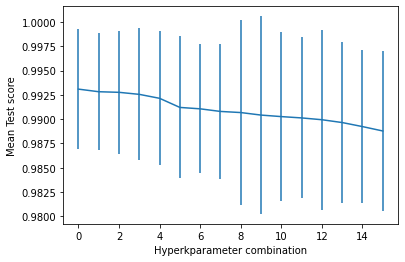

In [26]:
results['mean_test_score'].plot(yerr=[results['std_test_score'],results['std_test_score']])
plt.ylabel('Mean Test score')
plt.xlabel('Hyperkparameter combination')

In [27]:
#Lets do the predictions
x_train_pred=search.predict_proba(x_train)[:,1]
x_test_pred=search.predict_proba(x_test)[:,1]
print("Training roc_auc score:",roc_auc_score(y_train,x_train_pred))
print("Testing roc_auc score:",roc_auc_score(y_test,x_test_pred))

Training roc_auc score: 0.9999999999999999
Testing roc_auc score: 0.9973544973544973
